UNMG
Ingenieria en Multimedia  
Deep Learning  
# Homework1
Jenifer Lizethe Leiva Martin 1202617

https://www.datos.gov.co/dataset/Predios-Bogot-D-C/tibe-j9wc/about_data  
**1. Lectura del dataset predios Bogota D.C**

*   Inmueble no separado por otro predio público o privado
*   Con o sin construcciones y/o edificaciones
*   Perteneciente a personas naturales o jurídicas
*   Individualizados con una matrícula inmobiliaria

Resolución IGAC 070/2011

In [ ]:
file_path = "/content/TPREDIO.csv"
#libreria pandas para python
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path)

**2. Manejo de valores nulos**

In [ ]:
# Ajustar Pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

# valores nulos
nulos_por_columna = df.isnull().sum()

# Mostrar solo las columnas que tienen valores nulos
print(nulos_por_columna[nulos_por_columna > 0])

PREMDIRECC        1
PRETDIRECC    30678
PREDSI        30678
PREATERRE         1
PREACONST         1
PRECZHF          26
PRECDESTIN        1
PREVETUSTZ        1
PREVFORMA         1
PREVACTUAL        1
PRECUSO        1705
PREAUSO           1
PREUSOPH       1705
PREUSONPH      1705
PREUVIVIEN     1705
PREUCALIF      1705
PREFCALIF         1
PREEARMAZ      3728
PREEMUROS      6250
PREECUBIER     3730
PREECONS       3415
PREAFACHAD     2921
PREACUBIER     6539
PREAPISOS      3035
PREACONS       2629
PREBTAMANO    10826
PREBENCHAP    14578
PREBMOBILI    11609
PREBCONS      14394
PRECTAMANO    11240
PRECENCHAP    14869
PRECMOBILI    14609
PRECCONSE     14588
PRECINDUS     40406
PREACERCHA    40791
PRECLCONS      1705
BARMANPRE         1
PREPUNTAJE        1
dtype: int64


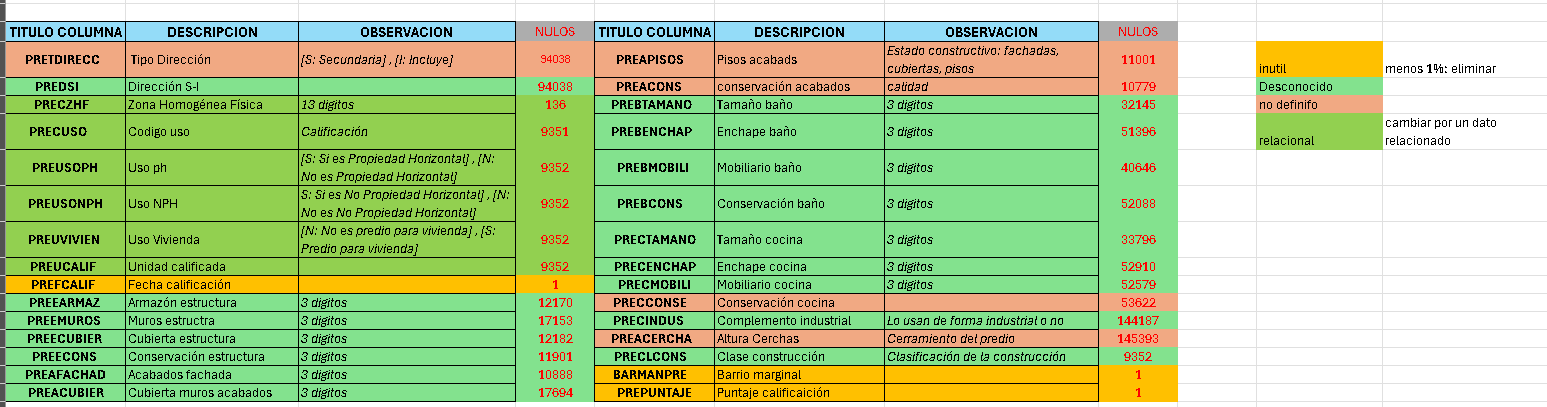

Clasificamos 4 tipos de datos nulos:  
1. Inutil: Son aquellos que representan un minimo insignificante, en este caso son tres columnas con solo 1 dato nulo.  
2. Desconocido: Son datos que no se pueden promediar o tratar por que son codigos que representan una caracterizacion, dificil de reemplazar, pero tampoco los eliminamos porque representan pocos datos de forma global.
3. No definido: Son datos cualitativos dificilmente reemplazables
4. Relacional: Son datos que podriamos cambiar por promedio o moda.

Manera de Clasificarlo

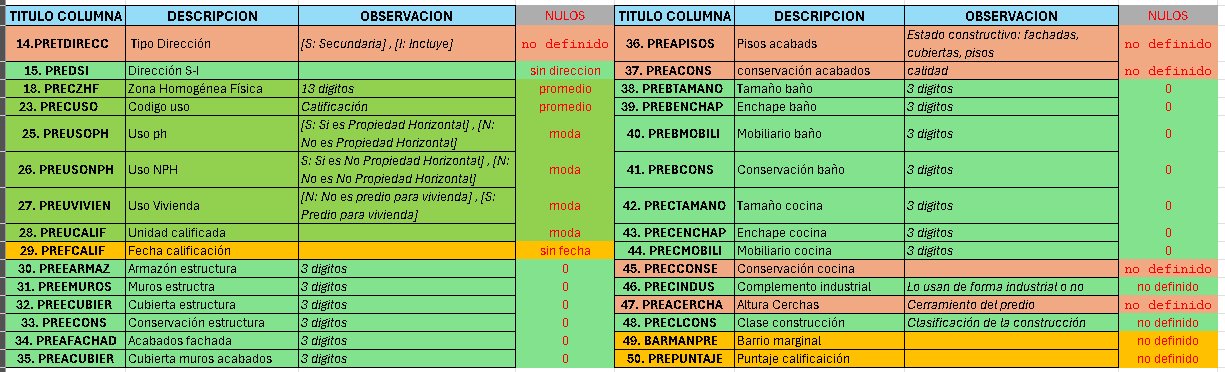

VALOR NULO INUTIL  
sin fecha

In [ ]:
#mostrar columnas antes de modificar
print(df.columns[[29]])

Index(['PREFCALIF'], dtype='object')


In [ ]:
#MODIFICACION
posiciones = [29]
columnas_objetivo = df.columns[posiciones]
df[columnas_objetivo] = df[columnas_objetivo].fillna("s.f")

VALOR NULO INUTIL/ VALOR INDEFINIDO/ VALOR DESCONOCIDo  
no definido

In [ ]:
#mostrar columnas antes de modificar
print(df.columns[[14,36,37,45,46,47,49,48,50]])

Index(['PRETDIRECC', 'PREAPISOS', 'PREACONS', 'PRECCONSE', 'PRECINDUS',
       'PREACERCHA', 'BARMANPRE', 'PRECLCONS', 'PREPUNTAJE'],
      dtype='object')


In [ ]:
#MODIFICACION
posiciones = [14,36,37,45,46,47,49,48,50]
columnas_objetivo = df.columns[posiciones]
df[columnas_objetivo] = df[columnas_objetivo].fillna("No definido")

VALOR DESCONOCIDO   
sin direccion

In [ ]:
#mostrar columnas antes de modificar
print(df.columns[[15]])

Index(['PREDSI'], dtype='object')


In [ ]:
#MODIFICACION
posiciones = [15]
columnas_objetivo = df.columns[posiciones]
df[columnas_objetivo] = df[columnas_objetivo].fillna("sin direccion")

VALOR DESCONOCIDo  
sin codigo

In [ ]:
#mostrar columnas antes de modificar
print(df.columns[[30,31,32,33,34,35,38,39,40,41,42,43,44]])

Index(['PREEARMAZ', 'PREEMUROS', 'PREECUBIER', 'PREECONS', 'PREAFACHAD',
       'PREACUBIER', 'PREBTAMANO', 'PREBENCHAP', 'PREBMOBILI', 'PREBCONS',
       'PRECTAMANO', 'PRECENCHAP', 'PRECMOBILI'],
      dtype='object')


In [ ]:
#MODIFICACION
posiciones = [30,31,32,33,34,35,38,39,40,41,42,43,44]
columnas_objetivo = df.columns[posiciones]
df[columnas_objetivo] = df[columnas_objetivo].fillna(0)

VALOR REEMPLAZABLE  
promedios

In [ ]:
#mostrar columnas antes de modificar
print(df.columns[[18,23]])

Index(['PRECZHF', 'PRECUSO'], dtype='object')


In [ ]:
# Promediar zona homogenea con respecto a los valores del mismo barrio
col_barrio = df.columns[0]   # columna 0 (barrio)
col_zona = df.columns[18]   # columna 18 (numérica)

# Rellenar valores nulos con el promedio del barrio
df[col_zona] = df.groupby(col_barrio)[col_zona].transform(
    lambda x: x.fillna(x.mean())
)

In [ ]:
# Promediar codigo uso con respecto a los valores del mismo barrio
col_barrio = df.columns[0]   # columna 0 (barrio)
col_uso = df.columns[23]   # columna 23 (numérica)

# Rellenar valores nulos con el promedio del barrio
df[col_uso] = df.groupby(col_barrio)[col_uso].transform(
    lambda x: x.fillna(x.mean())
)

VALOR REEMPLAZABLE  
moda

In [ ]:
#mostrar columnas antes de modificar
print(df.columns[[25,26,27,28]])

Index(['PREUSOPH', 'PREUSONPH', 'PREUVIVIEN', 'PREUCALIF'], dtype='object')


In [ ]:
# Obtener nombre de la columna 0 (barrio)
col_barrio = df.columns[0]

# columnas a las cuales aplicar la moda:
#propiedad horizontal, uso vivienda y unidad calificada
cols_moda = df.columns[[25,26,27,28]]

# Rellenar nulos con la moda por barrio
for col in cols_moda:
    df[col] = df.groupby(col_barrio)[col].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)
    )

/tmp/ipython-input-1208259937.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)


Rectificar la cantidad de nulos

In [ ]:
# Ajustar Pandas para mostrar todas las filas
pd.set_option('display.max_rows', None)

# valores nulos
nulos_por_columna = df.isnull().sum()

# Mostrar solo las columnas que tienen valores nulos
print(nulos_por_columna[nulos_por_columna > 0])

PREMDIRECC    1
PREATERRE     1
PREACONST     1
PRECZHF       3
PRECDESTIN    1
PREVETUSTZ    1
PREVFORMA     1
PREVACTUAL    1
PRECUSO       3
PREAUSO       1
PREUSOPH      3
PREUSONPH     3
PREUVIVIEN    3
PREUCALIF     3
dtype: int64


# **Definición de cada columna**

In [ ]:
#Mostrar todas las columnas
pd.set_option('display.max_columns', 51)
pd.set_option('display.max_rows', 5)
df.head(10)

,PRECBARRIO,PRENBARRIO,PRECMANZ,PRECPREDIO,PRECCONS,PRECRESTO,PRECHIP,PRECEDCATA,PRENUPRE,PRETPROP,PREFINCORP,PRECLASE,PREDIRECC,PREMDIRECC,PRETDIRECC,PREDSI,PREATERRE,PREACONST,PRECZHF,PRECDESTIN,PREVETUSTZ,PREVFORMA,PREVACTUAL,PRECUSO,PREAUSO,PREUSOPH,PREUSONPH,PREUVIVIEN,PREUCALIF,PREFCALIF,PREEARMAZ,PREEMUROS,PREECUBIER,PREECONS,PREAFACHAD,PREACUBIER,PREAPISOS,PREACONS,PREBTAMANO,PREBENCHAP,PREBMOBILI,PREBCONS,PRECTAMANO,PRECENCHAP,PRECMOBILI,PRECCONSE,PRECINDUS,PREACERCHA,PRECLCONS,BARMANPRE,PREPUNTAJE
0,1101,LAS BRISAS,9,1,22,2033,AAA0000CKTO,001101090102202033,110010111040100090001922020033,6,1997/12/31,P,KR 7 6 16 SUR GJ 114,D,No definido,sin direccion,6.60,10.1,6.882021e+12,1.0,1994.0,1998.0,2025.0,49.0,10.1,S,N,N,B,2002/12/31,113.0,121.0,133.0,142.0,212.0,221.0,232.0,241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No definido,No definido,No definido,R,1101009001.0,15.0
1,1101,LAS BRISAS,9,1,22,2034,AAA0000CKUZ,001101090102202034,110010111040100090001922020034,6,1997/12/31,P,KR 7 6 16 SUR GJ 115,D,No definido,sin direccion,6.60,10.1,6.882021e+12,1.0,1994.0,1998.0,2025.0,49.0,10.1,S,N,N,B,2002/12/31,113.0,121.0,133.0,142.0,212.0,221.0,232.0,241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No definido,No definido,No definido,R,1101009001.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,1101,LAS BRISAS,9,1,22,3007,AAA0000CLCN,001101090102203007,110010111040100090001922030007,6,1997/12/31,P,KR 7 6 16 SUR GJ 122,D,No definido,sin direccion,6.09,11.3,6.882021e+12,1.0,1994.0,1998.0,2025.0,49.0,11.3,S,N,N,B,2002/12/31,113.0,121.0,133.0,142.0,212.0,221.0,232.0,241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No definido,No definido,No definido,R,1101009001.0,15.0
9,1101,LAS BRISAS,9,1,22,3008,AAA0000CLDE,001101090102203008,110010111040100090001922030008,6,1997/12/31,P,KR 7 6 16 SUR GJ 123,D,No definido,sin direccion,6.09,11.3,6.882021e+12,1.0,1994.0,1998.0,2025.0,49.0,11.3,S,N,N,B,2002/12/31,113.0,121.0,133.0,142.0,212.0,221.0,232.0,241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No definido,No definido,No definido,R,1101009001.0,15.0




https://gestion.mincit.gov.co/Athena/GestionContratistas/anexos/Diccionario_de_Datos_Modelo_de_Aplicacion_de_Levantamiento_Catastral_v1.2_a3vrr6jh.pdf


https://gisvector.dadep.gov.co/arcgis/rest/services/IDECA/IDECA_Mapa_Referencia/MapServer/29


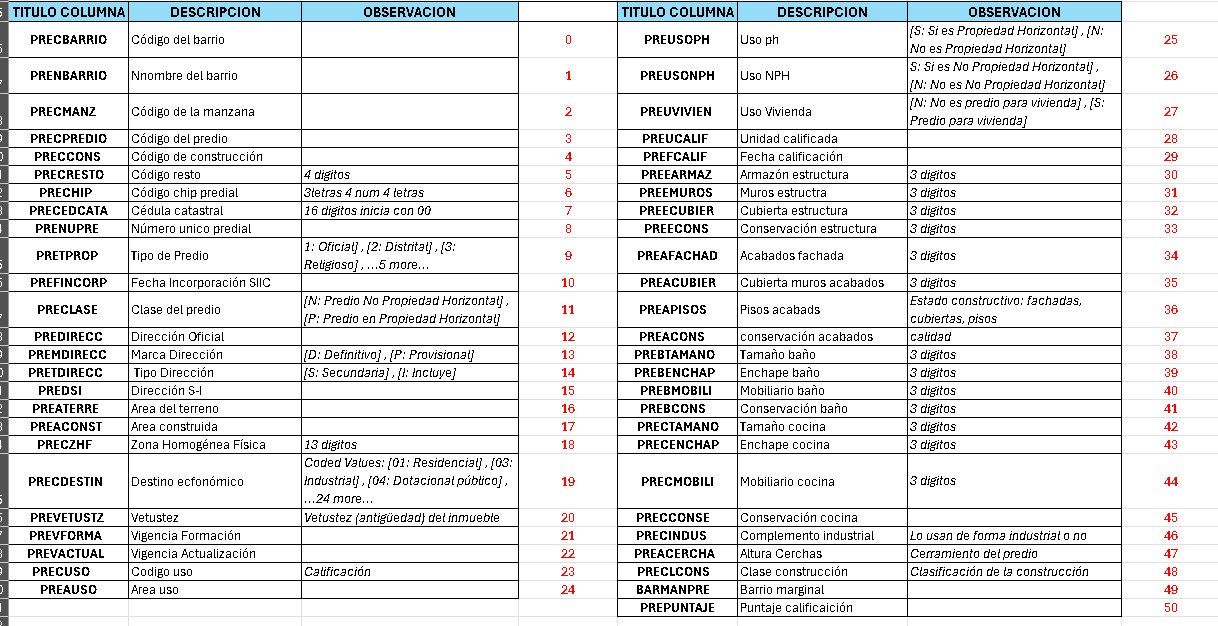

# Descarte de columnas innecesarias

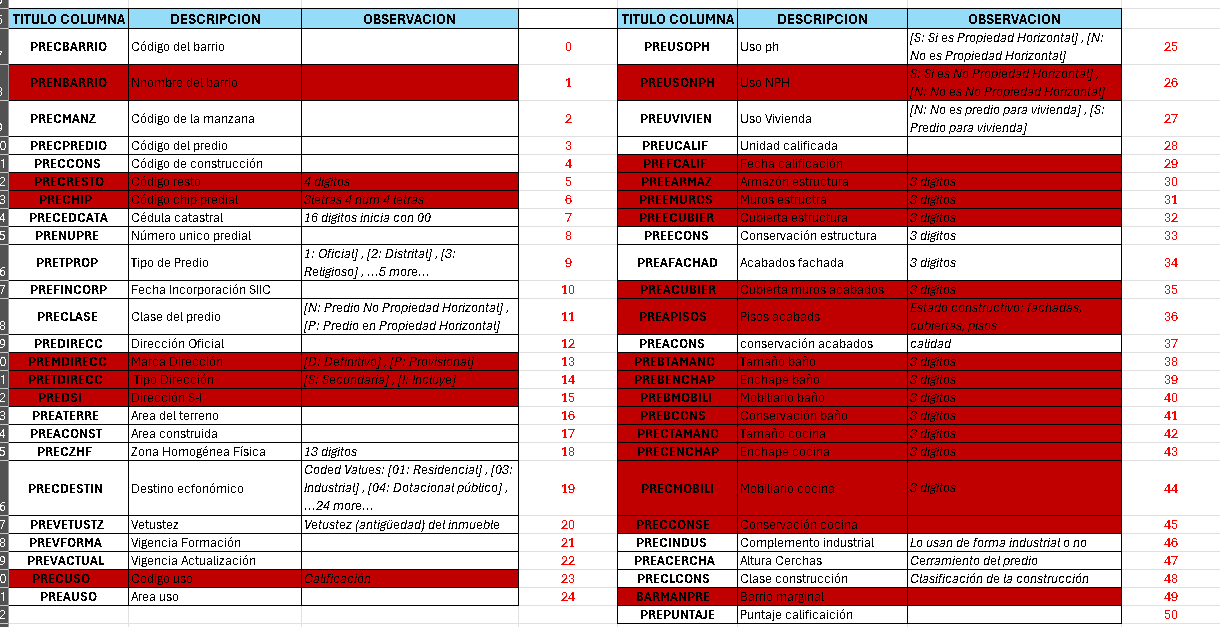

Seria posible eliminar columnas que no sirven segun los siguientes aspectos:


*   Nombre del barrio redunda el codigo del barrio
*   Los codigos de restauracion y chip pueden llegar a redundar la cedula catastral
*   La direeciones son secundarias a la oficial
*   El no usoph redunda usoph
*   Dejamos generales las especificaciones de la constuccion repesto a su calidad, conservacion y acabados
*   Ignoramos puntajes secundarios




In [ ]:
#mostrar columnas antes de descartar
print(df.columns[[1,5,6,13,14,15,23,26,29,30,31,32,35,36,38,39,40,41,42,43,44,45,49]])

Index(['PRENBARRIO', 'PRECRESTO', 'PRECHIP', 'PREMDIRECC', 'PRETDIRECC',
       'PREDSI', 'PRECUSO', 'PREUSONPH', 'PREFCALIF', 'PREEARMAZ', 'PREEMUROS',
       'PREECUBIER', 'PREACUBIER', 'PREAPISOS', 'PREBTAMANO', 'PREBENCHAP',
       'PREBMOBILI', 'PREBCONS', 'PRECTAMANO', 'PRECENCHAP', 'PRECMOBILI',
       'PRECCONSE', 'BARMANPRE'],
      dtype='object')


In [ ]:
df = df.drop(df.columns[[1,5,6,13,14,15,23,26,29,30,31,32,35,36,38,39,40,41,42,43,44,45,49]], axis=1)

In [ ]:
#mostrar limpieza
pd.set_option('display.max_columns', 51)
pd.set_option('display.max_rows', 5)
df.head(10)

,PRECBARRIO,PRECMANZ,PRECPREDIO,PRECCONS,PRECEDCATA,PRENUPRE,PRETPROP,PREFINCORP,PRECLASE,PREDIRECC,PREATERRE,PREACONST,PRECZHF,PRECDESTIN,PREVETUSTZ,PREVFORMA,PREVACTUAL,PREAUSO,PREUSOPH,PREUVIVIEN,PREUCALIF,PREECONS,PREAFACHAD,PREACONS,PRECINDUS,PREACERCHA,PRECLCONS,PREPUNTAJE
0,1101,9,1,22,001101090102202033,110010111040100090001922020033,6,1997/12/31,P,KR 7 6 16 SUR GJ 114,6.60,10.1,6.882021e+12,1.0,1994.0,1998.0,2025.0,10.1,S,N,B,142.0,212.0,241.0,No definido,No definido,R,15.0
1,1101,9,1,22,001101090102202034,110010111040100090001922020034,6,1997/12/31,P,KR 7 6 16 SUR GJ 115,6.60,10.1,6.882021e+12,1.0,1994.0,1998.0,2025.0,10.1,S,N,B,142.0,212.0,241.0,No definido,No definido,R,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,1101,9,1,22,001101090102203007,110010111040100090001922030007,6,1997/12/31,P,KR 7 6 16 SUR GJ 122,6.09,11.3,6.882021e+12,1.0,1994.0,1998.0,2025.0,11.3,S,N,B,142.0,212.0,241.0,No definido,No definido,R,15.0
9,1101,9,1,22,001101090102203008,110010111040100090001922030008,6,1997/12/31,P,KR 7 6 16 SUR GJ 123,6.09,11.3,6.882021e+12,1.0,1994.0,1998.0,2025.0,11.3,S,N,B,142.0,212.0,241.0,No definido,No definido,R,15.0
